<a href="https://colab.research.google.com/github/elaamranisoufiane/-rock_paper_scissor_game_java/blob/master/image_super_resultion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/fannymonori/TF-LapSRN.git

Cloning into 'TF-LapSRN'...
remote: Enumerating objects: 135, done.
remote: Total 135 (delta 0), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (135/135), 42.90 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [15]:
!git clone https://github.com/Saafke/EDSR_Tensorflow.git

Cloning into 'EDSR_Tensorflow'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 149 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (149/149), 162.50 MiB | 28.06 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (15/15), done.


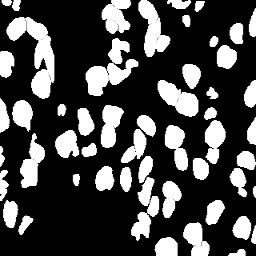

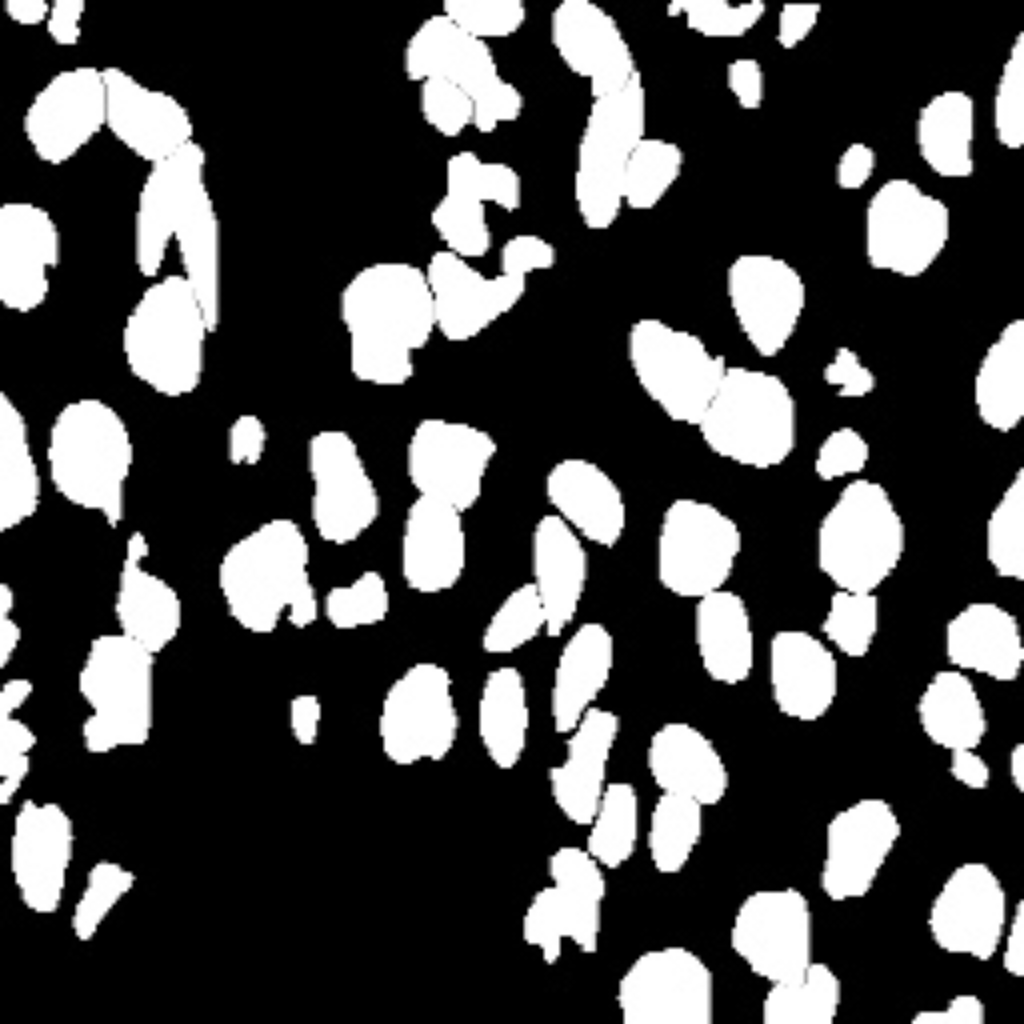

Time taken in seconds by lapsrn 6.5695109367370605


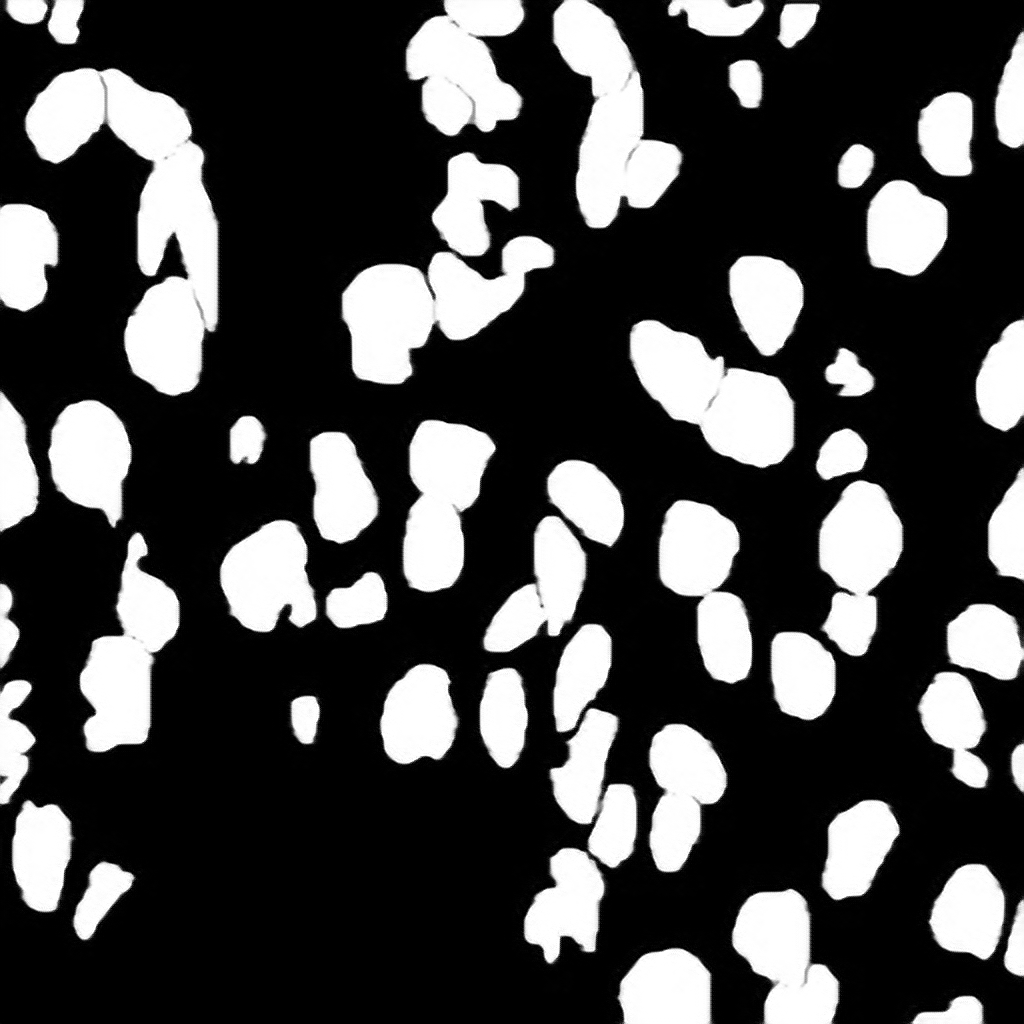

Time taken in seconds by edsr 100.13789176940918


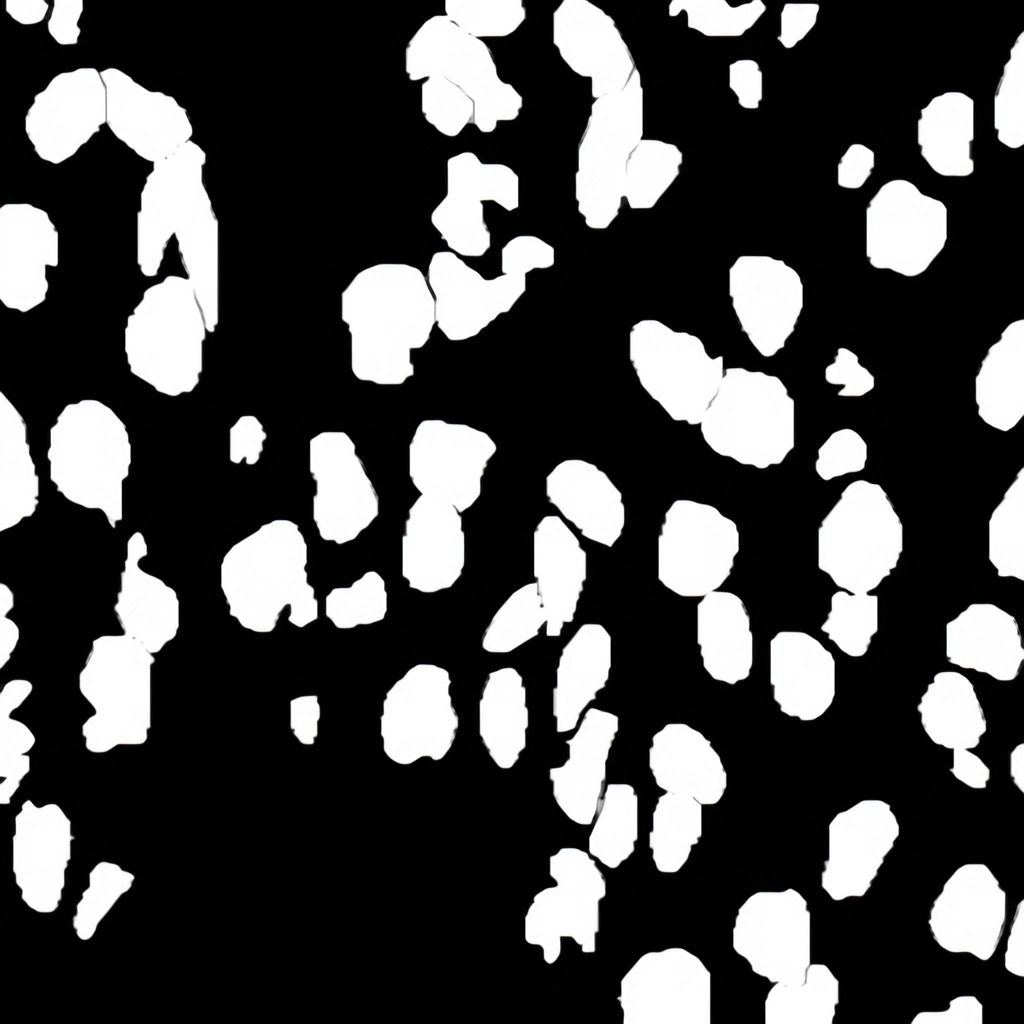

In [1]:
import cv2
import time
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2.jpg')
width = img.shape[1]
height = img.shape[0]
bicubic = cv2.resize(img,(width*4,height*4))
cv2_imshow(img)
cv2_imshow(bicubic)

super_res = cv2.dnn_superres.DnnSuperResImpl_create()

start = time.time()
super_res.readModel('/content/TF-LapSRN/export/LapSRN_x4.pb')
super_res.setModel('lapsrn',4)
lapsrn_image = super_res.upsample(img)
end = time.time()
print('Time taken in seconds by lapsrn', end-start)
cv2_imshow(lapsrn_image)
 
start = time.time()
super_res.readModel('/content/EDSR_Tensorflow/models/EDSR_x4.pb')
super_res.setModel('edsr',4)
edsr_image = super_res.upsample(img)
end = time.time()
print('Time taken in seconds by edsr', end-start)
cv2_imshow(edsr_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()